In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from vae.arch import VAE

Using TensorFlow backend.


In [3]:
new_data = np.load('./data/obs_data_car_racing_19.npz')["arr_0"]
data = np.array([item for obs in new_data for item in obs])

In [4]:
print(data.dtype)
print(data.shape)
print(9888*64*64*3*4/1024/1024)

float32
(12138, 64, 64, 3)
463.5


In [4]:
vae = VAE(True)

In [5]:
vae.set_weights('./vae/weights.h5')

In [6]:
vae.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 31, 31, 32)   1568        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 64)   32832       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 6, 6, 128)    131200      conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

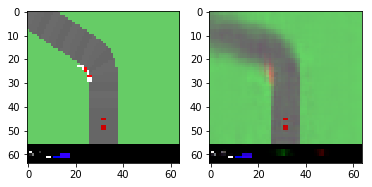

In [13]:
f, axarr = plt.subplots(1, 2)
img1 = data[30]

axarr[0].imshow(img1)

dream_img1 = vae.model.predict(x = np.expand_dims(img1, axis=0))
axarr[1].imshow(dream_img1[0])

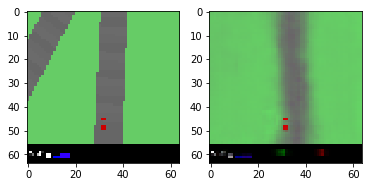

In [14]:
f, axarr = plt.subplots(1, 2)
img1 = data[530]

axarr[0].imshow(img1)

dream_img1 = vae.model.predict(x = np.expand_dims(img1, axis=0))
axarr[1].imshow(dream_img1[0])

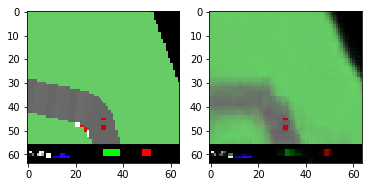

In [22]:
f, axarr = plt.subplots(1, 2)
img1 = data[46]

axarr[0].imshow(img1)

dream_img1 = vae.model.predict(x = np.expand_dims(img1, axis=0))
axarr[1].imshow(dream_img1[0])

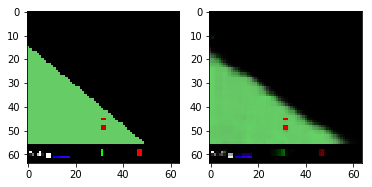

In [8]:
f, axarr = plt.subplots(1, 2)
img2 = data[80]
axarr[0].imshow(img2)

dream_img2 = vae.model.predict(x = np.expand_dims(img2, axis=0))
axarr[1].imshow(dream_img2[0])

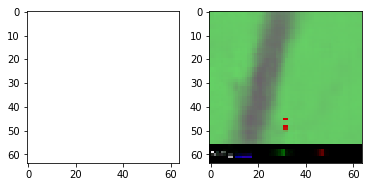

In [9]:
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(np.ones((64,64,3)))

dream_img2 = vae.model.predict(x = np.expand_dims(np.ones((64,64,3)), axis=0))
axarr[1].imshow(dream_img2[0])

In [1]:
import numpy as np
new_data = np.load('./data/obs_data_car_racing_19.npz')["arr_0"]

In [3]:
del new_data

In [6]:
import gc
gc.collect()

0

In [4]:
def f():
    import numpy as np
    new_data = np.load('./data/obs_data_car_racing_19.npz')["arr_0"]
    size = new_data.shape[0]
    return size

In [5]:
from multiprocessing.pool import ThreadPool
pool = ThreadPool(processes=1)

async_result = pool.apply_async(f, ())

return_val = async_result.get()

print(return_val)

64
